In [2]:
%load_ext autoreload
%autoreload 2

import torch
from pytorch3d.io import load_objs_as_meshes
from pytorch3d.structures import Meshes
from pytorch3d.renderer import CamerasBase

from text3d2video.ipython_utils import display_ims
from text3d2video.rendering import render_depth_map

In [3]:
from text3d2video.mesh_processing import normalize_meshes

device = torch.device("cuda")
meshes = load_objs_as_meshes(["data/meshes/cat.obj"], device=device)
meshes = normalize_meshes(meshes)

def mesh_views(mesh: Meshes, cameras: CamerasBase, resolution=100):
    frames = meshes.extend(len(cameras))
    depth_maps = render_depth_map(frames, cameras, resolution=resolution)
    display_ims(depth_maps)

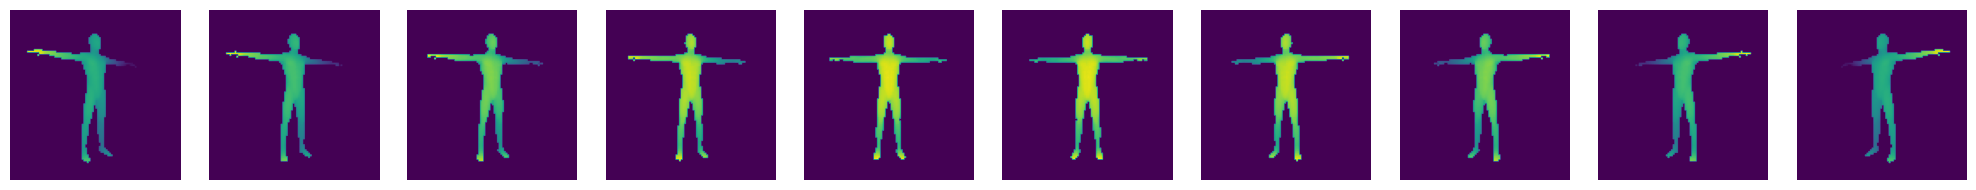

In [4]:
from text3d2video.camera_placement import turntable_cameras

cameras = turntable_cameras(10, dist=1.2, start_angle=-30, stop_angle=30, device=device)

mesh_views(meshes, cameras)

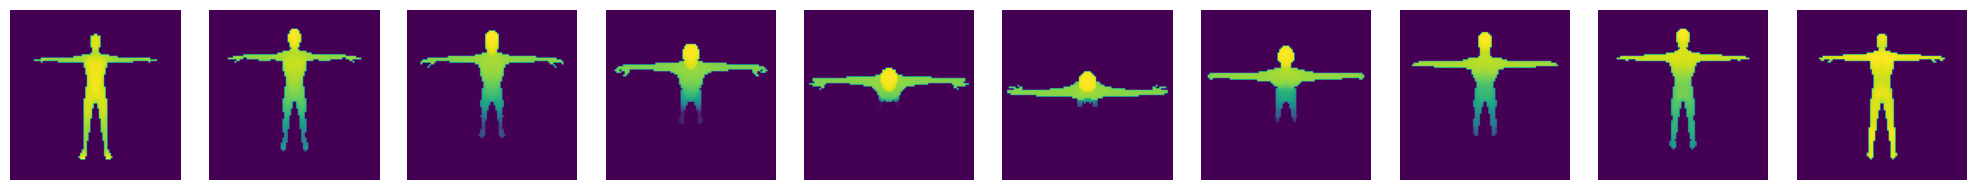

In [5]:
cameras = turntable_cameras(10, dist=1.2, start_angle=0, stop_angle=180, vertical=True)
mesh_views(meshes, cameras)

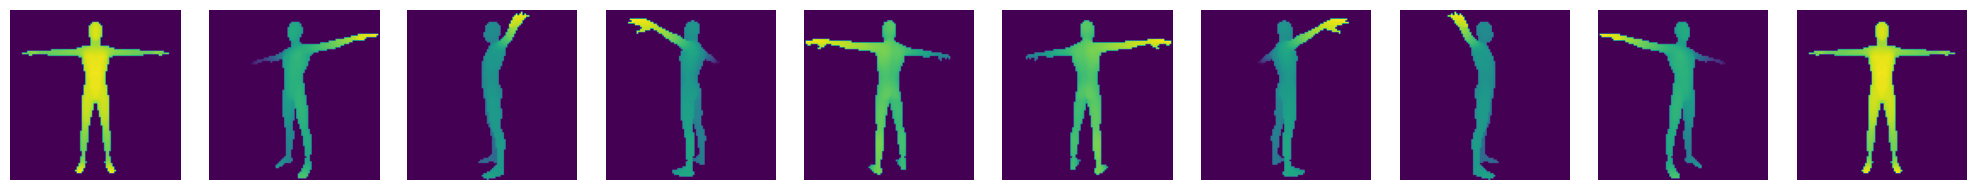

In [6]:
from text3d2video.camera_placement import turntable_cameras

cameras = turntable_cameras(10, dist=1, device=device)

mesh_views(meshes, cameras)

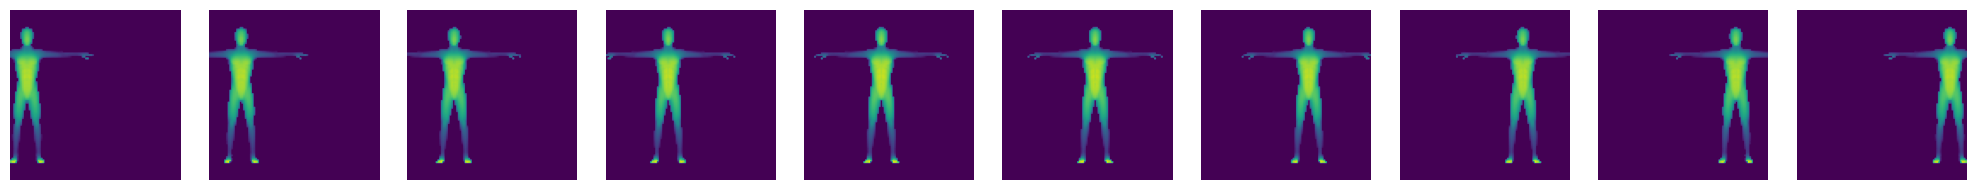

In [7]:
from text3d2video.camera_placement import sideways_orthographic_cameras

cameras = sideways_orthographic_cameras(n=10, x_0=0.5, x_1=-0.5)
mesh_views(meshes, cameras)

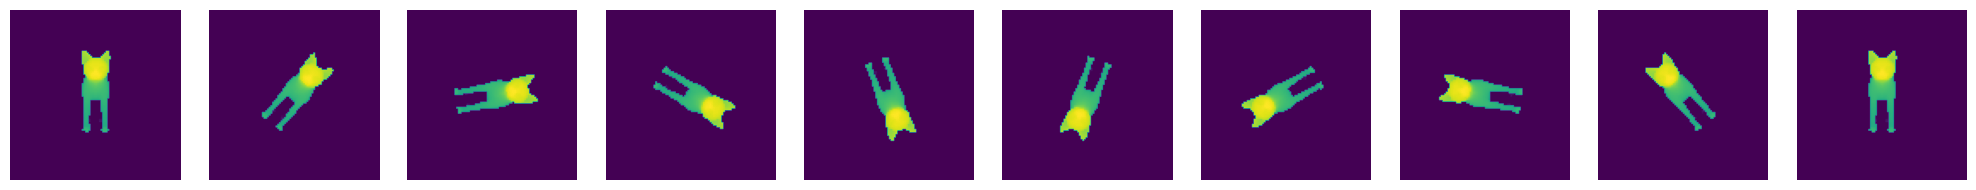

In [27]:
from text3d2video.camera_placement import front_view_rotating


cams = front_view_rotating(n=10, dist=1.2)
mesh_views(meshes, cams)

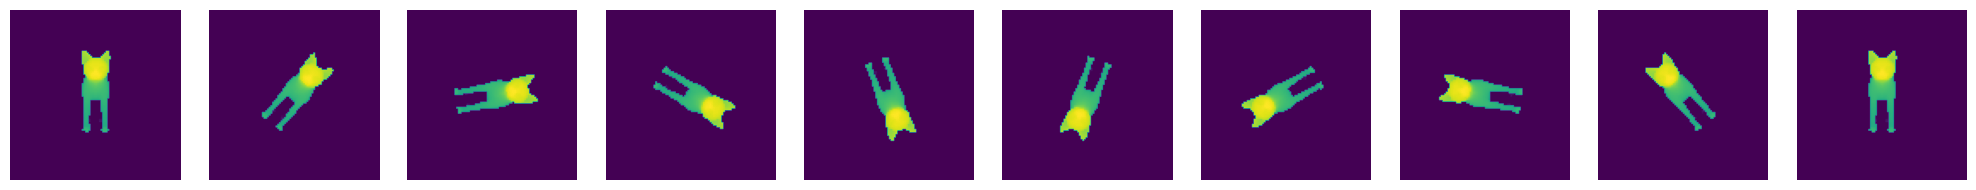

In [28]:
from text3d2video.camera_placement import front_view_rotating


cams = front_view_rotating(n=10, dist=1.2)
mesh_views(meshes, cams)

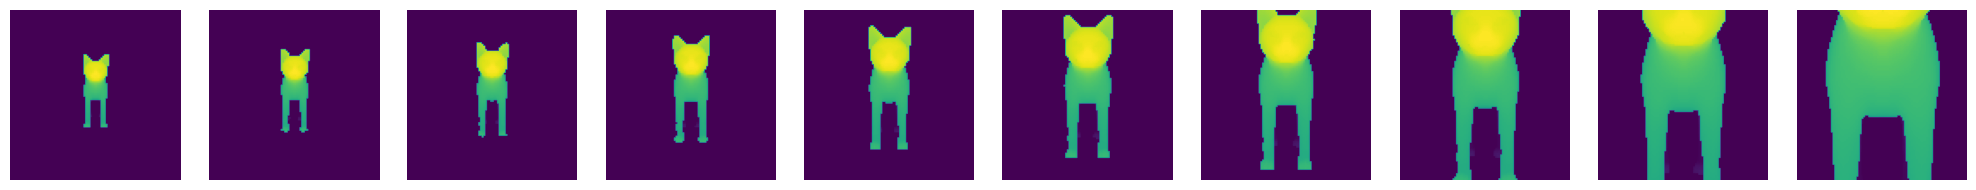

In [ ]:
from text3d2video.camera_placement import fov_zoom, z_movement_cameras

meshes = load_objs_as_meshes(["data/meshes/cat.obj"], device=device)
meshes = normalize_meshes(meshes)

cams = fov_zoom(n=10)
mesh_views(meshes, cams)

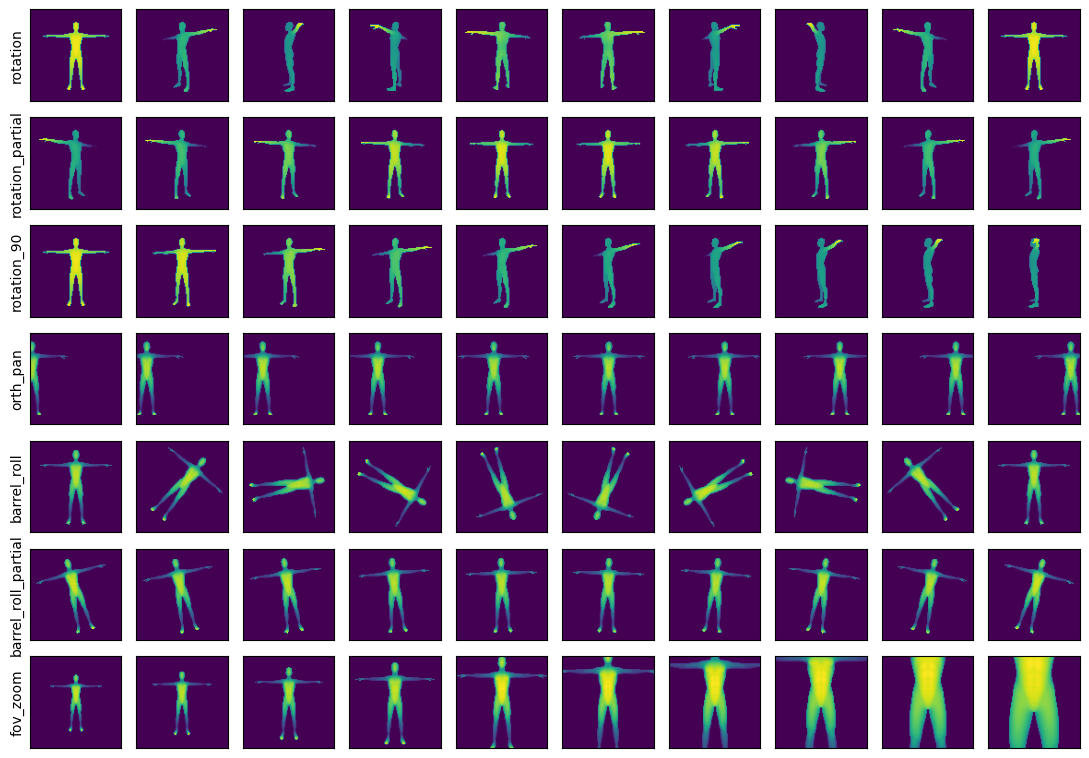

: 

In [ ]:
from text3d2video.camera_trajectories import BarrelRoll, BarrelRollPartial, FoVZoom, OrthographicPan, Rotation90, RotationFull, RotationPartial
from text3d2video.ipython_utils import display_ims_grid

meshes = load_objs_as_meshes(["data/meshes/mixamo-human.obj"], device=device)
meshes = normalize_meshes(meshes)

trajectories = [
    RotationFull(),
    RotationPartial(),
    Rotation90(),
    OrthographicPan(),
    BarrelRoll(),
    BarrelRollPartial(),
    FoVZoom(),
]

resolution = 100
N = 10
renders = []
for i, trajectory in enumerate(trajectories):
    cameras = trajectory.cameras(N)
    frames = meshes.extend(len(cameras))
    depth_maps = render_depth_map(frames, cameras, resolution=resolution)
    renders.append(depth_maps)

display_ims_grid(renders, row_titles=[t.name for t in trajectories], scale=1.1)